In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from matplotlib import image

# Step 1: Load image as array
img = image.imread("Pictures/PetratosIMG.jpeg")

# Step 2: Save it as a .npy file
np.save("Pictures/PetratosIMG.npy", img)

print("Image successfully converted to Petratos.npy")

Image successfully converted to Petratos.npy


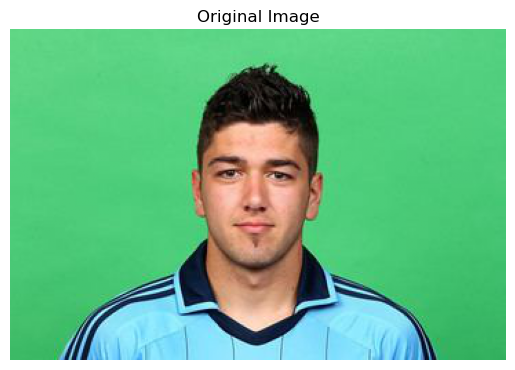

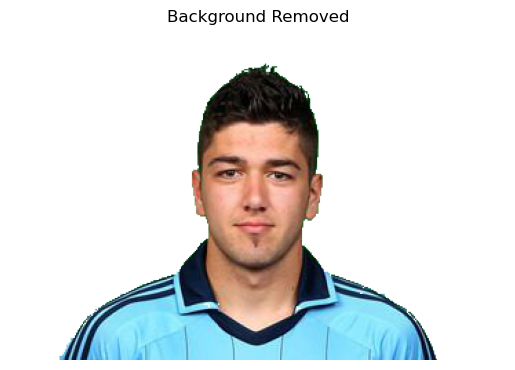

Pixel matrix with alpha channel:

[[[ 95. 214. 132.   0.]
  [ 95. 214. 132.   0.]
  [ 94. 213. 131.   0.]
  ...
  [ 85. 211. 130.   0.]
  [ 85. 211. 130.   0.]
  [ 85. 211. 130.   0.]]

 [[ 95. 214. 132.   0.]
  [ 95. 214. 132.   0.]
  [ 95. 214. 132.   0.]
  ...
  [ 84. 210. 129.   0.]
  [ 84. 210. 129.   0.]
  [ 84. 210. 129.   0.]]

 [[ 96. 215. 133.   0.]
  [ 96. 215. 133.   0.]
  [ 96. 215. 133.   0.]
  ...
  [ 83. 209. 128.   0.]
  [ 83. 209. 128.   0.]
  [ 83. 209. 128.   0.]]

 ...

 [[ 60. 186. 102.   0.]
  [ 60. 186. 102.   0.]
  [ 60. 186. 102.   0.]
  ...
  [ 50. 176.  94.   0.]
  [ 51. 177.  95.   0.]
  [ 51. 177.  95.   0.]]

 [[ 60. 186. 102.   0.]
  [ 60. 186. 102.   0.]
  [ 60. 186. 102.   0.]
  ...
  [ 50. 176.  94.   0.]
  [ 50. 176.  94.   0.]
  [ 51. 177.  95.   0.]]

 [[ 60. 186. 102.   0.]
  [ 60. 186. 102.   0.]
  [ 60. 186. 102.   0.]
  ...
  [ 49. 175.  93.   0.]
  [ 50. 176.  94.   0.]
  [ 50. 176.  94.   0.]]]


In [5]:
try:
    pic = np.load("Pictures/PetratosIMG.npy")

     # Show original image
    plt.imshow(pic / 255)
    plt.axis('off')
    plt.title("Original Image")
    plt.show()

    # Add alpha channel if not there
    if pic.shape[2] == 3:
        alpha = 255 * np.ones((pic.shape[0], pic.shape[1], 1))
        pic = np.concatenate((pic, alpha), axis=2)

    # Find green pixels: green > 120 and green > red and blue
    green = (pic[:, :, 1] > 120) & (pic[:, :, 1] > pic[:, :, 0]) & (pic[:, :, 1] > pic[:, :, 2])

    # Make green pixels transparent
    pic[green, 3] = 0

    # Show image with pixels scaled 0-1 for floats
    plt.imshow(pic / 255)
    plt.axis('off')
    plt.title("Background Removed")
    plt.show()
    print("Pixel matrix with alpha channel:\n")
    print(pic)

except FileNotFoundError:
    print("File not found!")